Proje 3 (salery Tahmin)

Ridge Regresyon

In [44]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn import model_selection
import matplotlib.pyplot as plt 
from sklearn.linear_model import RidgeCV

In [45]:
df=pd.read_csv("Hitters.csv")

In [46]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [47]:
df.shape

(322, 20)

In [7]:
# eksik degerler 

In [48]:
df.isnull().sum()

AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64

In [49]:
df=df.dropna()

In [50]:
df.shape

(263, 20)

In [ ]:
#263 deger kaldi

#kac frekans(sinif)

In [51]:
df["League"].value_counts()

A    139
N    124
Name: League, dtype: int64

In [52]:
df["Division"].value_counts()

W    134
E    129
Name: Division, dtype: int64

In [53]:
df["NewLeague"].value_counts()

A    141
N    122
Name: NewLeague, dtype: int64

In [54]:
#donusum ypl

In [55]:
dms=pd.get_dummies(df[["League","Division","NewLeague"]], drop_first=True)

In [56]:
dms.head()

,League_N,Division_W,NewLeague_N
1,1,1,1
2,0,1,0
3,1,0,1
4,1,0,1
5,0,1,0


In [57]:
# kategoriler 2 sinifli ise 1-0 ....label encoder....
# 2 den fazla ise ....one hot encodeing.....
# daha fazla ise ....dummi....

In [ ]:
# kategorik degiskenleri  .....dummi...

In [58]:
df=pd.get_dummies(df, columns=["League","Division","NewLeague"],drop_first=True)

In [59]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_N,Division_W,NewLeague_N
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0,1,1,1
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0,0,1,0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0,1,0,1
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5,1,0,1
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,750.0,0,1,0


In [60]:
# salary sil
y=df["Salary"]
x=df.drop("Salary",axis=1)

In [61]:
x.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,1,1,1
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,0,1,0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,1,0,1
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,1,0,1
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,0,1,0


In [ ]:
#train test

In [62]:
x_train, x_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    test_size = 0.20,
                                                    random_state =46)

In [63]:
ridge_model = Ridge().fit(x_train, y_train)

In [ ]:
#degiskenlerin katsayilarina bakalim

In [64]:
ridge_model.coef_

array([-1.24983261e+00,  5.21635095e+00,  5.99953730e+00,  8.11444821e-01,
       -1.32339857e+00,  2.21500510e+00, -7.20081345e-03, -4.07245382e-01,
        1.71379429e+00,  2.41233831e+00,  3.92493586e-01, -7.25551240e-01,
       -6.94096173e-02,  3.28303081e-01,  1.59739783e-01, -5.95098543e-01,
        6.58770989e+01, -5.32933827e+01, -4.60724983e+01])

In [ ]:
#model denklemi

In [66]:
ridge_model.intercept_

41.23775972250297

#Tahmin

In [68]:
y_pred = ridge_model.predict(x_test)
np.sqrt(mean_squared_error(y_test, y_pred))

479.2257726107692

In [ ]:
#479. yuksek  bagimli degiskenin dagilimina bakilir :::SALAR ORTALAMA 535

In [69]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AtBat,263.0,403.642586,147.307209,19.0,282.5,413.0,526.0,687.0
Hits,263.0,107.828897,45.125326,1.0,71.5,103.0,141.5,238.0
HmRun,263.0,11.619772,8.757108,0.0,5.0,9.0,18.0,40.0
Runs,263.0,54.745247,25.539816,0.0,33.5,52.0,73.0,130.0
RBI,263.0,51.486692,25.882714,0.0,30.0,47.0,71.0,121.0
Walks,263.0,41.114068,21.718056,0.0,23.0,37.0,57.0,105.0
Years,263.0,7.311787,4.793616,1.0,4.0,6.0,10.0,24.0
CAtBat,263.0,2657.543726,2286.582929,19.0,842.5,1931.0,3890.5,14053.0
CHits,263.0,722.186312,648.199644,4.0,212.0,516.0,1054.0,4256.0
CHmRun,263.0,69.239544,82.197581,0.0,15.0,40.0,92.5,548.0


In [ ]:
# hata yüksek model optimize edelim hatayi dusurelim

In [71]:
ridge_model

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [ ]:
# verdigim araliklarda hata nerde dusuk ise o nu alayim

In [74]:
np.linspace(0,1,100)

array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
       0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909,
       0.1010101 , 0.11111111, 0.12121212, 0.13131313, 0.14141414,
       0.15151515, 0.16161616, 0.17171717, 0.18181818, 0.19191919,
       0.2020202 , 0.21212121, 0.22222222, 0.23232323, 0.24242424,
       0.25252525, 0.26262626, 0.27272727, 0.28282828, 0.29292929,
       0.3030303 , 0.31313131, 0.32323232, 0.33333333, 0.34343434,
       0.35353535, 0.36363636, 0.37373737, 0.38383838, 0.39393939,
       0.4040404 , 0.41414141, 0.42424242, 0.43434343, 0.44444444,
       0.45454545, 0.46464646, 0.47474747, 0.48484848, 0.49494949,
       0.50505051, 0.51515152, 0.52525253, 0.53535354, 0.54545455,
       0.55555556, 0.56565657, 0.57575758, 0.58585859, 0.5959596 ,
       0.60606061, 0.61616162, 0.62626263, 0.63636364, 0.64646465,
       0.65656566, 0.66666667, 0.67676768, 0.68686869, 0.6969697 ,
       0.70707071, 0.71717172, 0.72727273, 0.73737374, 0.74747

In [89]:
alphas=10**np.linspace(10,-2,100)*0.5

In [90]:
ridge_model=Ridge()
coefs=[]
for i in alphas:
    ridge_model.set_params(alpha=i)
    ridge_model.fit(x_train,y_train)
    y_pred=ridge_model.predict(x_test)
    print(np.sqrt(mean_squared_error(y_test,y_pred)))

489.4888435455721
485.3571119652054
480.9886654641195
476.6300063524503
472.5762802768837
469.11548331192387
466.4621193455397
464.70699623223805
463.80551590104255
463.6073349427901
463.9098250901548
464.5108709161416
465.244470471982
465.99558250584204
466.6994554687628
467.3328446992651
467.90251042539114
468.4334370449688
468.9573671844715
469.50215754942127
470.0835999731052
470.702203484162
471.34642091816505
472.000843739304
472.65504218368824
473.3085513057542
473.97047368204954
474.65598103322037
475.3834758537557
476.17404507243464
477.0510868245345
478.0364159262706
479.1418059329965
480.35971104693454
481.65925755297167
482.9909921172405
484.29848712838344
485.53122151298805
486.65350703456323
487.6472867708201
488.50969191771117
489.2477792645073
489.8729398901421
490.39672361900386
490.82878117196503
491.1766521618973
491.44656463852016
491.6444085436291
491.77638532625775
491.8491701810355
491.86961174806305
491.84409641766456
491.7777650382542
491.6737689104016
491.5326

In [92]:
ridge_model=Ridge()
coefs=[]
for i in alphas:
    ridge_model.set_params(alpha=i)
    ridge_model.fit(x_train,y_train)
    coefs.append(ridge_model.coef_)

In [93]:
coefs

[array([ 1.22726434e-03,  4.08343764e-04,  6.85674660e-05,  2.31415000e-04,
         2.34974973e-04,  1.81339418e-04,  2.73200743e-05,  1.84282360e-02,
         5.50629096e-03,  7.04704782e-04,  2.92986371e-03,  2.87345417e-03,
         2.02323913e-03,  1.94052434e-03, -2.39581686e-05,  2.59515380e-06,
        -8.05647088e-08, -1.57461901e-06, -5.39516197e-08]),
 array([ 1.60021560e-03,  5.33029353e-04,  8.90044455e-05,  3.02435037e-04,
         3.05355597e-04,  2.35582390e-04,  3.33704386e-05,  2.29637113e-02,
         6.88760275e-03,  8.87820790e-04,  3.67508069e-03,  3.60242710e-03,
         2.52790070e-03,  2.55232250e-03, -2.67501967e-05,  3.86521724e-06,
        -9.48183956e-08, -2.06054121e-06, -6.30067895e-08]),
 array([ 2.08123969e-03,  6.94188976e-04,  1.15140002e-04,  3.94433115e-04,
         3.95555856e-04,  3.05060036e-04,  3.99060951e-05,  2.82141222e-02,
         8.50484859e-03,  1.10653481e-03,  4.55458024e-03,  4.46144569e-03,
         3.11678685e-03,  3.35354068e-03, 

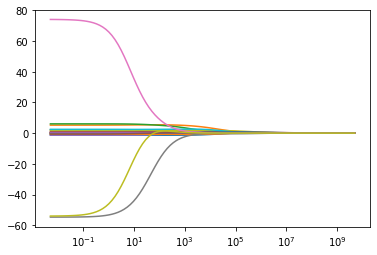

In [94]:
ax=plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale("log")

In [96]:
ridge_model=Ridge().fit(x_train,y_train)
y_pred=ridge_model.predict(x_test)
np.sqrt(mean_squared_error(y_test,y_pred))

479.2257726107692

# Model Tuning

In [97]:
alphas1=np.random.randint(0,1000,100)
alphas2=10**np.linspace(10,-2,100)*0.5
alphas3=np.linspace(0,1,1000)

In [100]:
ridge_cv=RidgeCV(alphas=alphas1,scoring="neg_mean_squared_error", cv=10, normalize=True)

In [101]:
ridge_cv.fit(x_train,y_train)

RidgeCV(alphas=array([143, 967, 168, 380, 686, 104, 829,  30, 119, 287, 292, 148, 241,
       268, 252, 906, 827, 399,  97, 703, 706, 981, 904, 278,  94, 751,
       299, 742, 773,  32, 972, 693, 403, 541,  62, 600, 948, 873, 593,
       232, 753, 550, 916, 315, 335, 724, 834,  47, 849, 438, 801, 499,
        74,  85,  43,  76, 172, 156, 879, 563, 505, 750, 891, 774, 891,
       232, 928,  28, 836, 804, 157, 254, 606, 495, 744, 337, 443, 364,
       713, 508, 385,   4, 609, 438, 170, 946, 992,  25, 560,  94, 135,
       707, 598, 940, 546, 312, 102, 642, 709, 276]),
        cv=10, fit_intercept=True, gcv_mode=None, normalize=True,
        scoring='neg_mean_squared_error', store_cv_values=False)

In [103]:
ridge_cv.alpha_

4

In [104]:
ridge_cv=RidgeCV(alphas=alphas2,scoring="neg_mean_squared_error", cv=10, normalize=True)

In [105]:
ridge_cv.fit(x_train,y_train)

RidgeCV(alphas=array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+0...
       3.28966612e-01, 2.48851178e-01, 1.88246790e-01, 1.42401793e-01,
       1.07721735e-01, 8.14875417e-02, 6.16423370e-02, 4.66301673e-02,
       3.52740116e-02, 2.66834962e-02, 2.01850863e-02, 1.52692775e-02,
       1.15506485e-02, 8.73764200e-03, 6.60970574e-03, 5.00000000e-03]),
        cv=10, fit_intercept=True, gcv_mode=None, normalize=True,
        scoring='neg_mean_squared_error', store_cv_values=False)

In [106]:
ridge_cv.alpha_

0.4348745013088917

In [112]:
ridge_cv=RidgeCV(alphas=alphas3,scoring="neg_mean_squared_error", cv=10, normalize=True)

In [115]:
ridge_cv.fit(x_train,y_train)

RidgeCV(alphas=array([0.        , 0.001001  , 0.002002  , 0.003003  , 0.004004  ,
       0.00500501, 0.00600601, 0.00700701, 0.00800801, 0.00900901,
       0.01001001, 0.01101101, 0.01201201, 0.01301301, 0.01401401,
       0.01501502, 0.01601602, 0.01701702, 0.01801802, 0.01901902,
       0.02002002, 0.02102102, 0.02202202, 0.02302302, 0.02402402,
       0.02502503, 0.02602603, 0.02702703, 0.02802803, 0.02902903,
       0.03003003, 0.0...
       0.97597598, 0.97697698, 0.97797798, 0.97897898, 0.97997998,
       0.98098098, 0.98198198, 0.98298298, 0.98398398, 0.98498498,
       0.98598599, 0.98698699, 0.98798799, 0.98898899, 0.98998999,
       0.99099099, 0.99199199, 0.99299299, 0.99399399, 0.99499499,
       0.995996  , 0.996997  , 0.997998  , 0.998999  , 1.        ]),
        cv=10, fit_intercept=True, gcv_mode=None, normalize=True,
        scoring='neg_mean_squared_error', store_cv_values=False)

In [116]:
ridge_cv.alpha_

0.3933933933933934

Tuned Model

In [118]:
ridge_tuned=Ridge(alpha=0.3933933933933934).fit(x_train,y_train)
y_pred=ridge_model.predict(x_test)
np.sqrt(mean_squared_error(y_test,y_pred))

479.2257726107692